# Introduction
Diabetes is a serious, long-term condition with a major impact on the lives and well-being of individuals, families, and societies worldwide. It is among the top 10 causes of death in adults, and was estimated to have caused four million deaths globally in 2017 [1]. In 2017

he global diabetes prevalence in 2019 is estimated to be 9.3% (463 million people), rising to 10.2% (578 million) by 2030 and 10.9% (700 million) by 2045. The prevalence is higher in urban (10.8%) than rural (7.2%) areas, and in high-income (10.4%) than low-income countries (4.0%). One in two (50.1%) people living with diabetes do not know that they have diabetes. The global prevalence of impaired glucose tolerance is estimated to be 7.5% (374 million) in 2019 and projected to reach 8.0% (454 million) by 2030 and 8.6% (548 million) by 2045

For reference

https://www.diabetesresearchclinicalpractice.com/article/S0168-8227(19)31230-6/fulltext

# IDF Diabetes Atlas Eighth Edition 2019
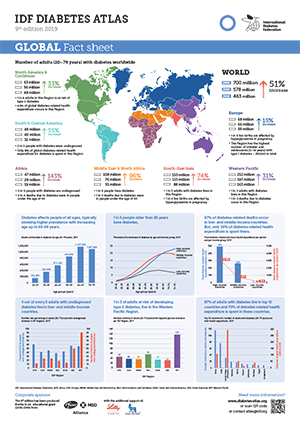

This link contains the complete picture clearly https://diabetesatlas.org/upload/resources/material/20191218_144459_2019_global_factsheet.pdf

For reference
https://diabetesatlas.org/en/resources/

First we import the main libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
%matplotlib inline

import Dataset

In [70]:
diabetes_data = pd.read_csv('datasets_228_482_diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
diabetes_data.shape

(768, 9)

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:

* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [72]:
diabetes_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  Basic EDA and statistical analysis

In [73]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


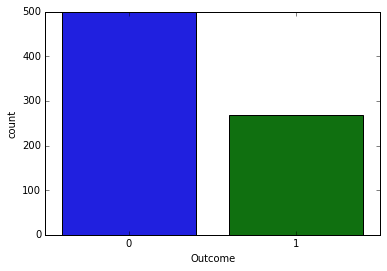

In [74]:
sns.countplot(x='Outcome',data=diabetes_data)
plt.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

/////////////////////////////////////////////////////////////////////////////////////////////////////

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [75]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

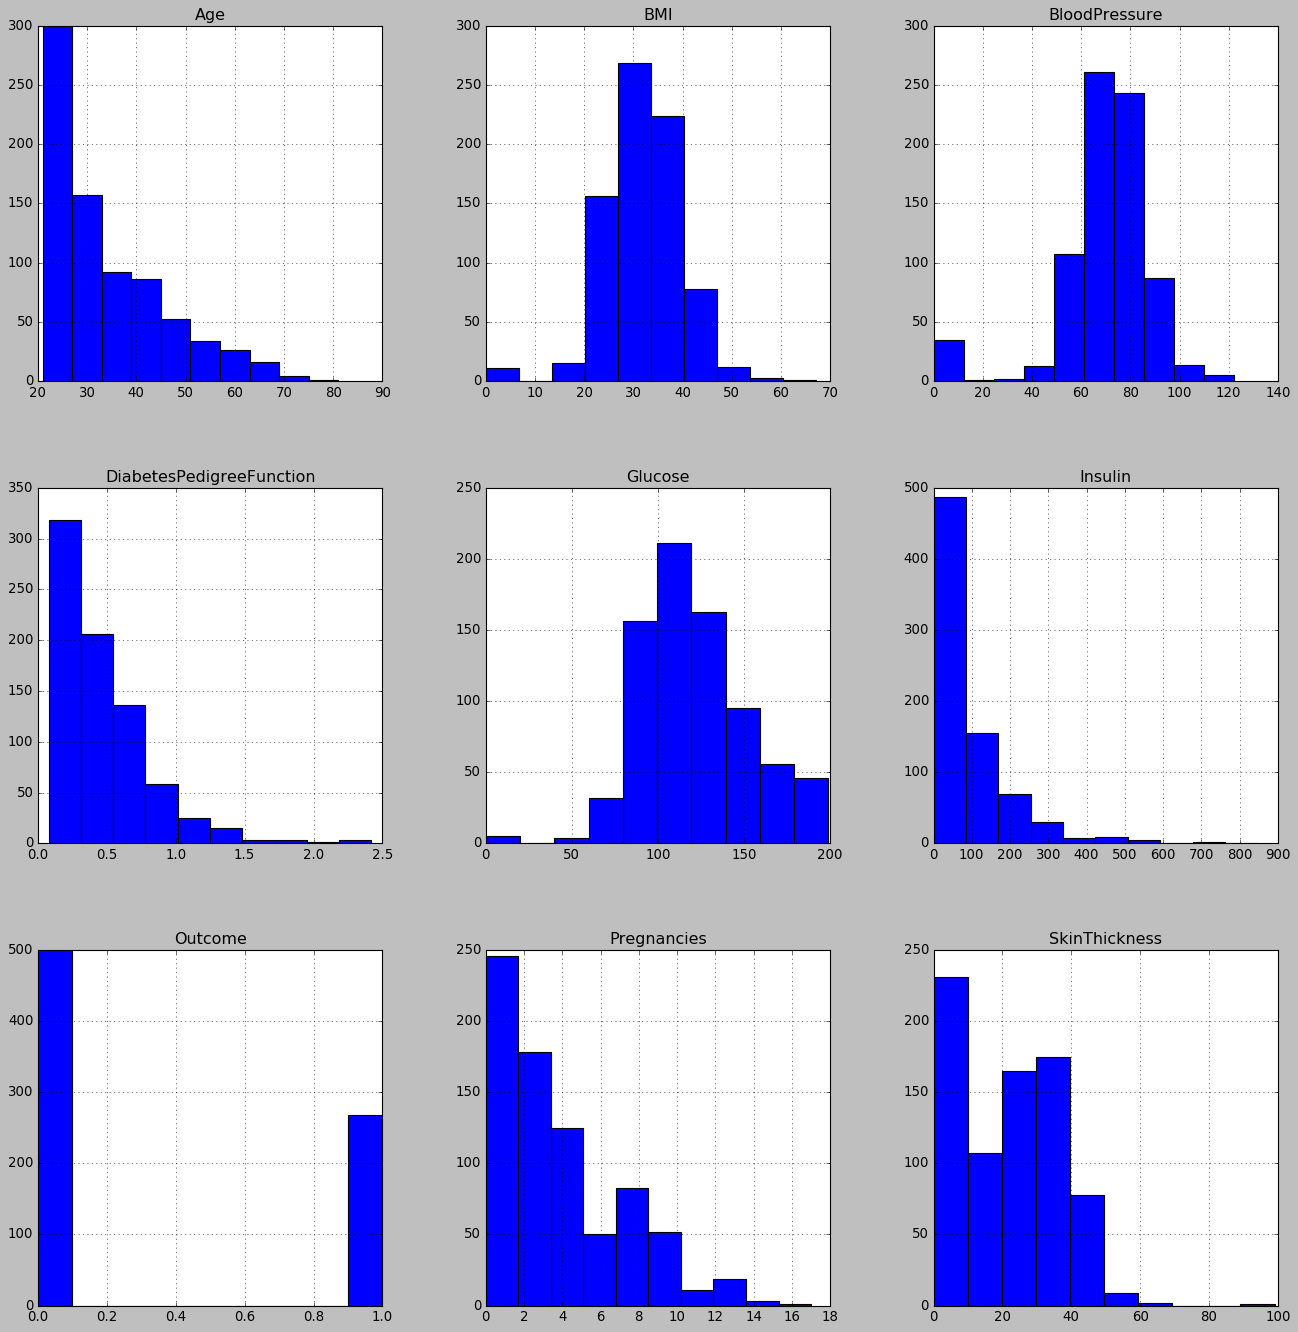

In [76]:
plt.style.use('classic')
plot = diabetes_data.hist(figsize = (20,20))

Aiming to impute nan values for the columns in accordance with their distribution

In [77]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [78]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Plotting after Nan removal

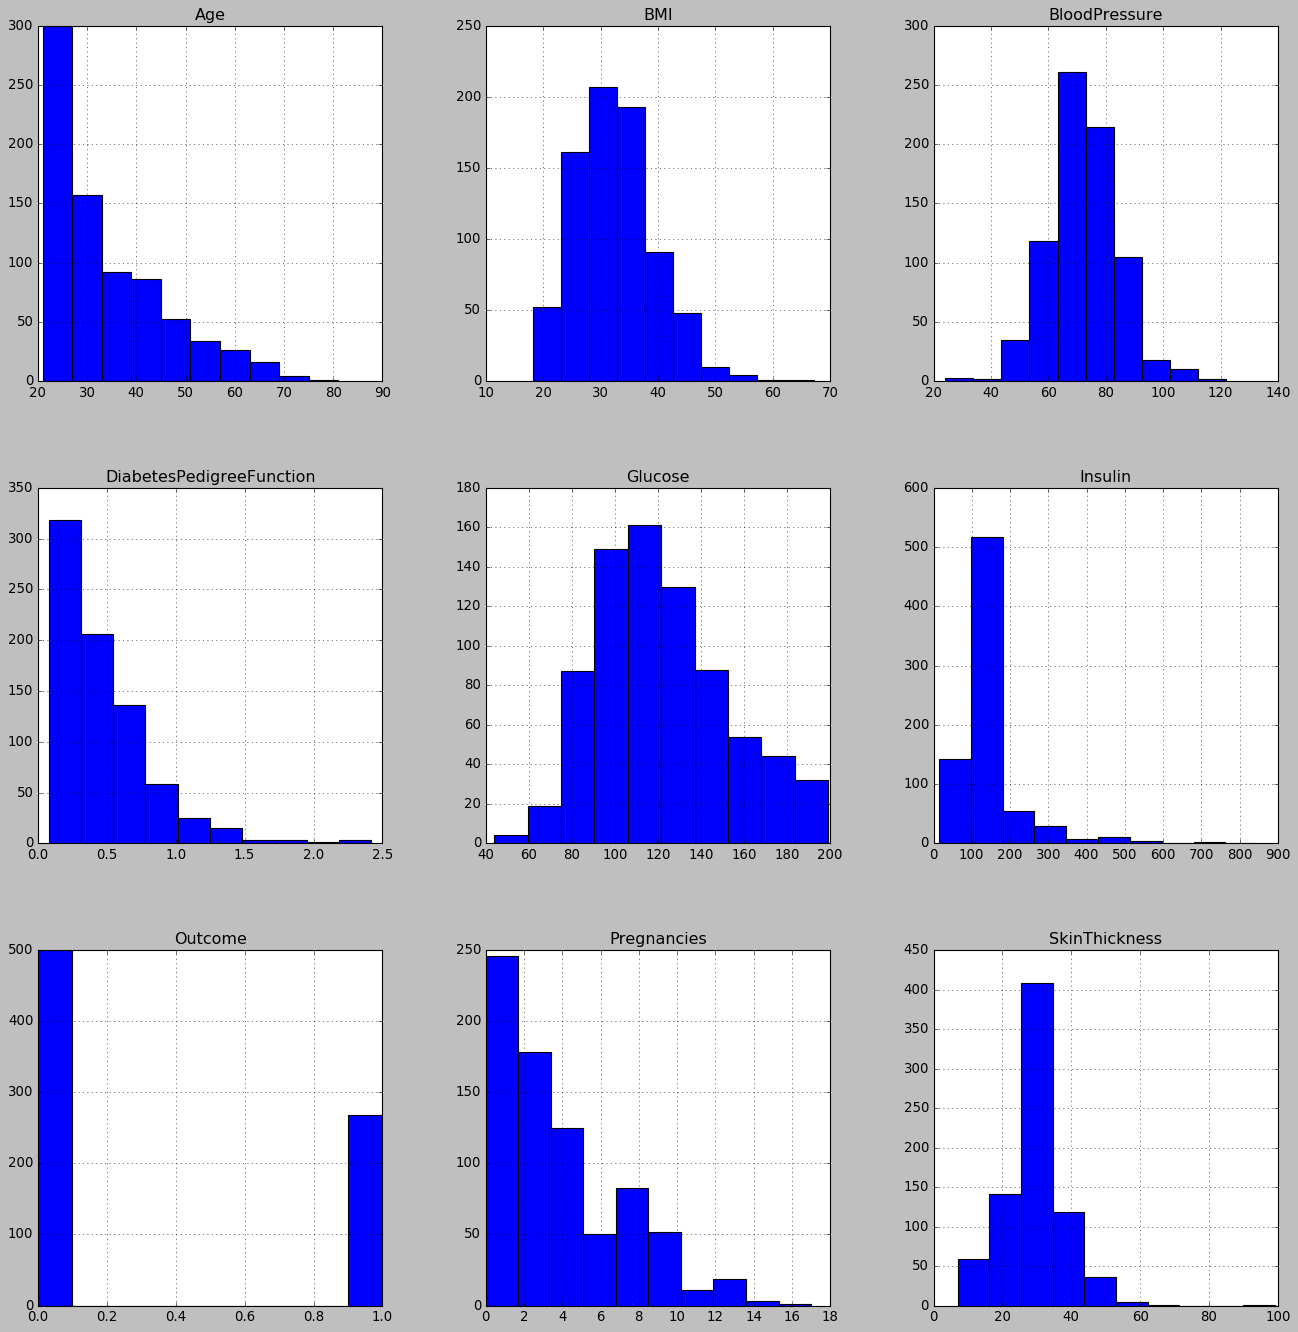

In [79]:
plot = diabetes_data_copy.hist(figsize = (20,20))


Scatter matrix of uncleaned data

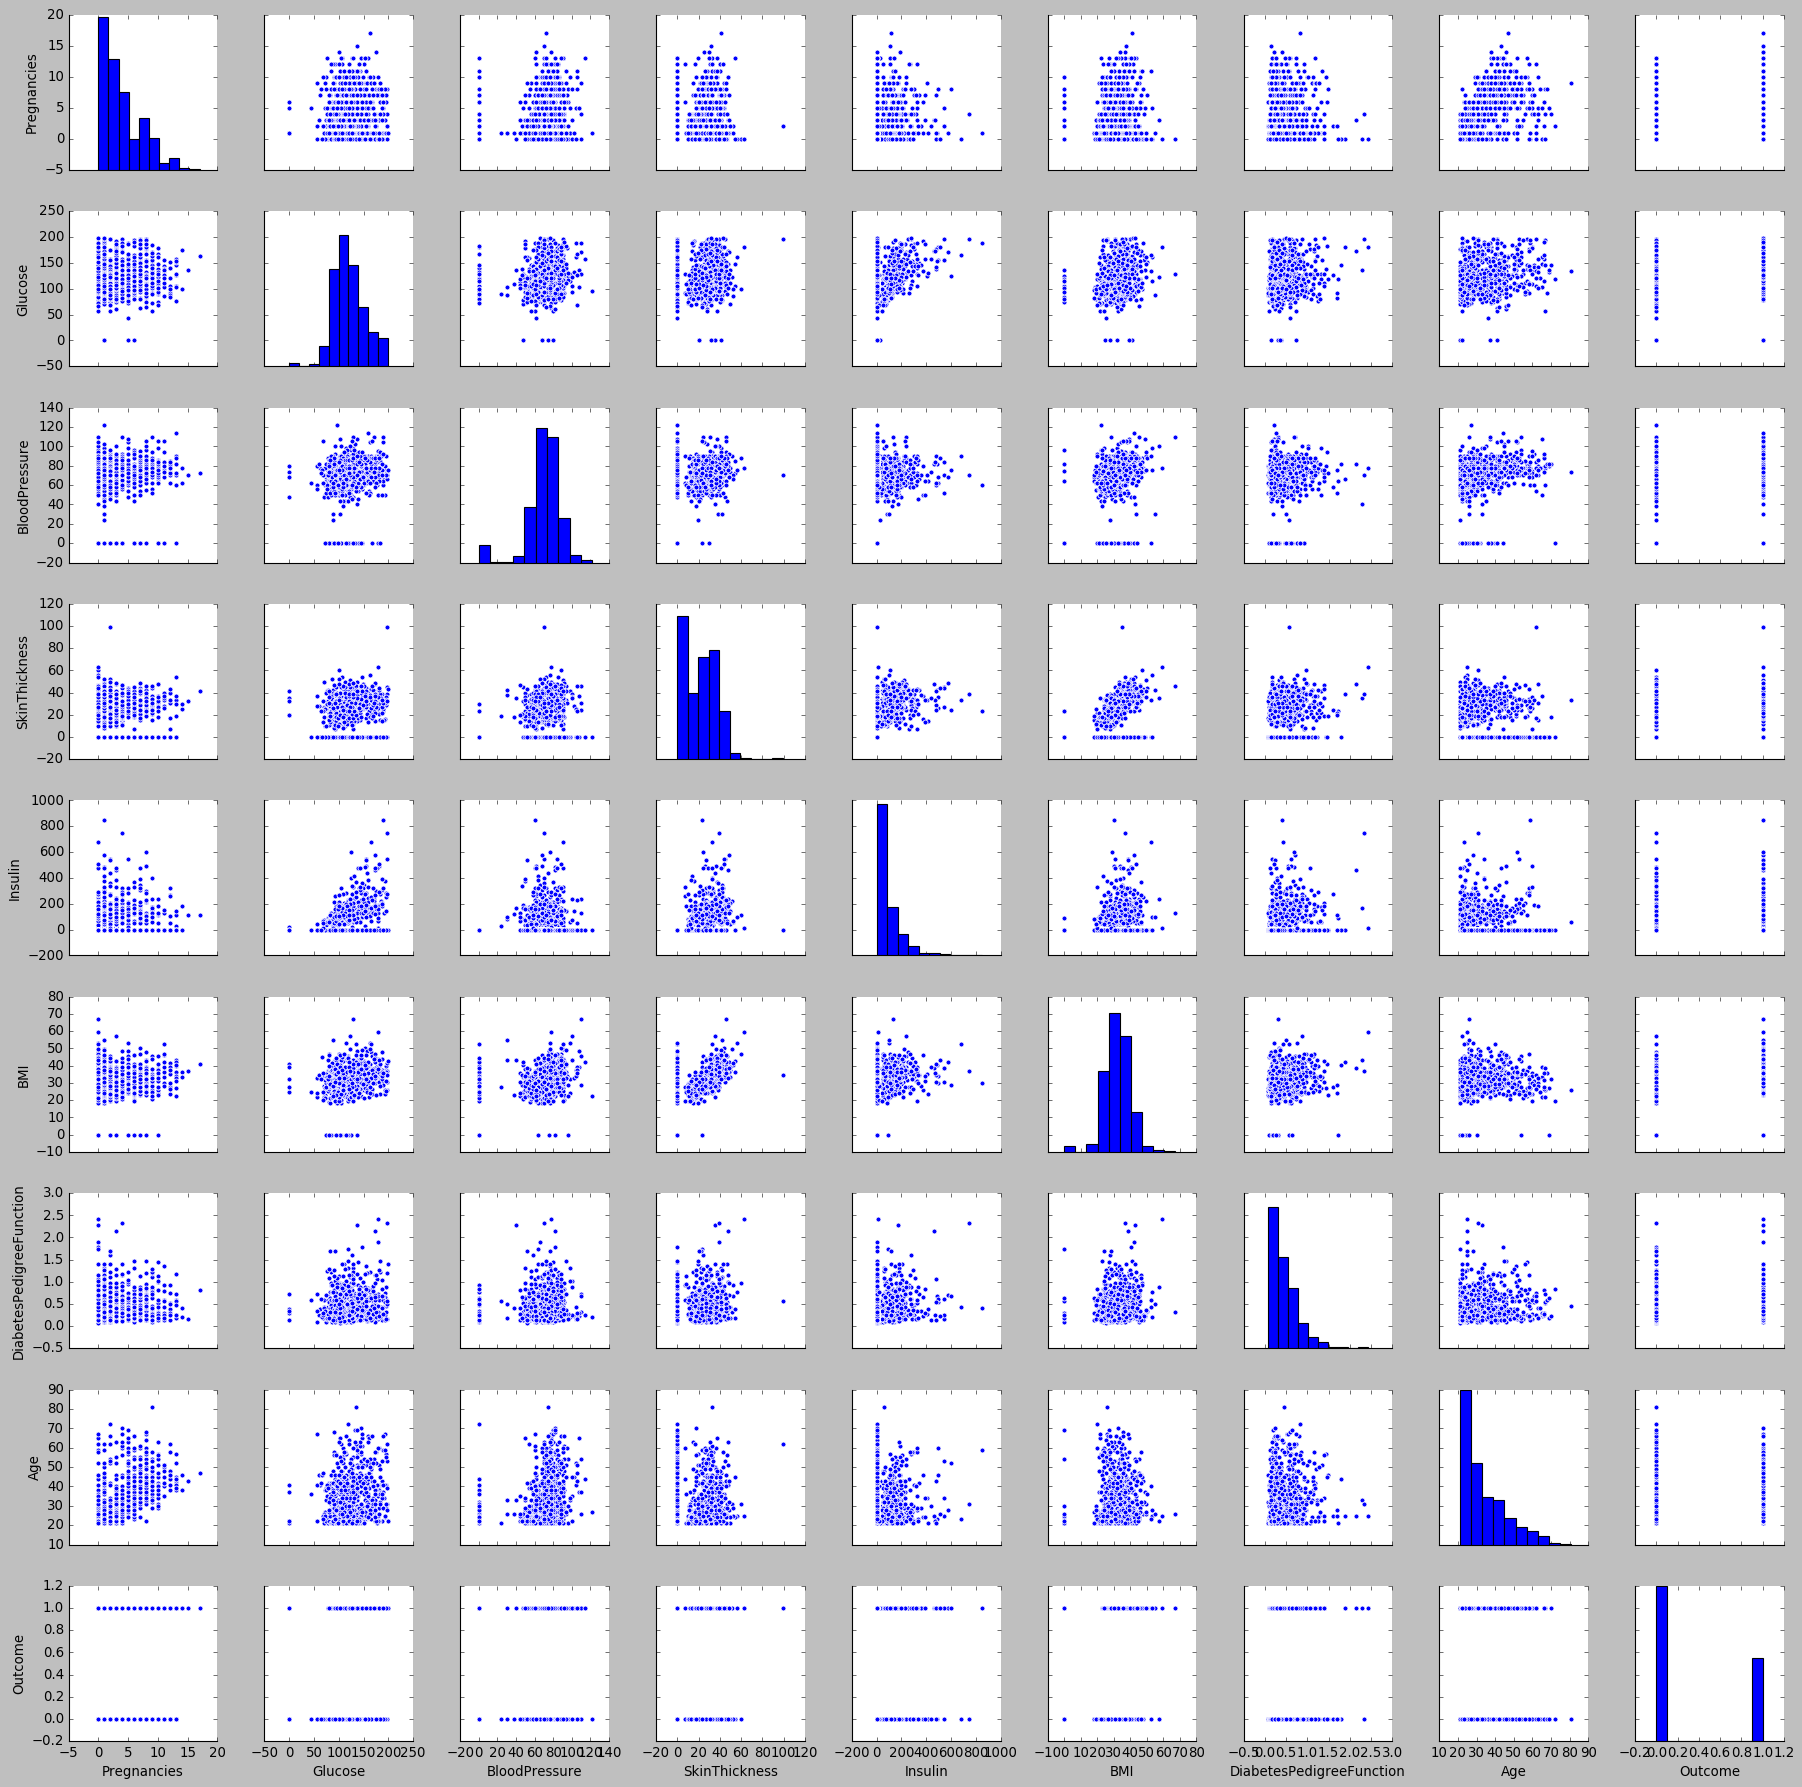

In [80]:

sns.pairplot(diabetes_data )

Pair plot for clean data

LinAlgError: singular matrix

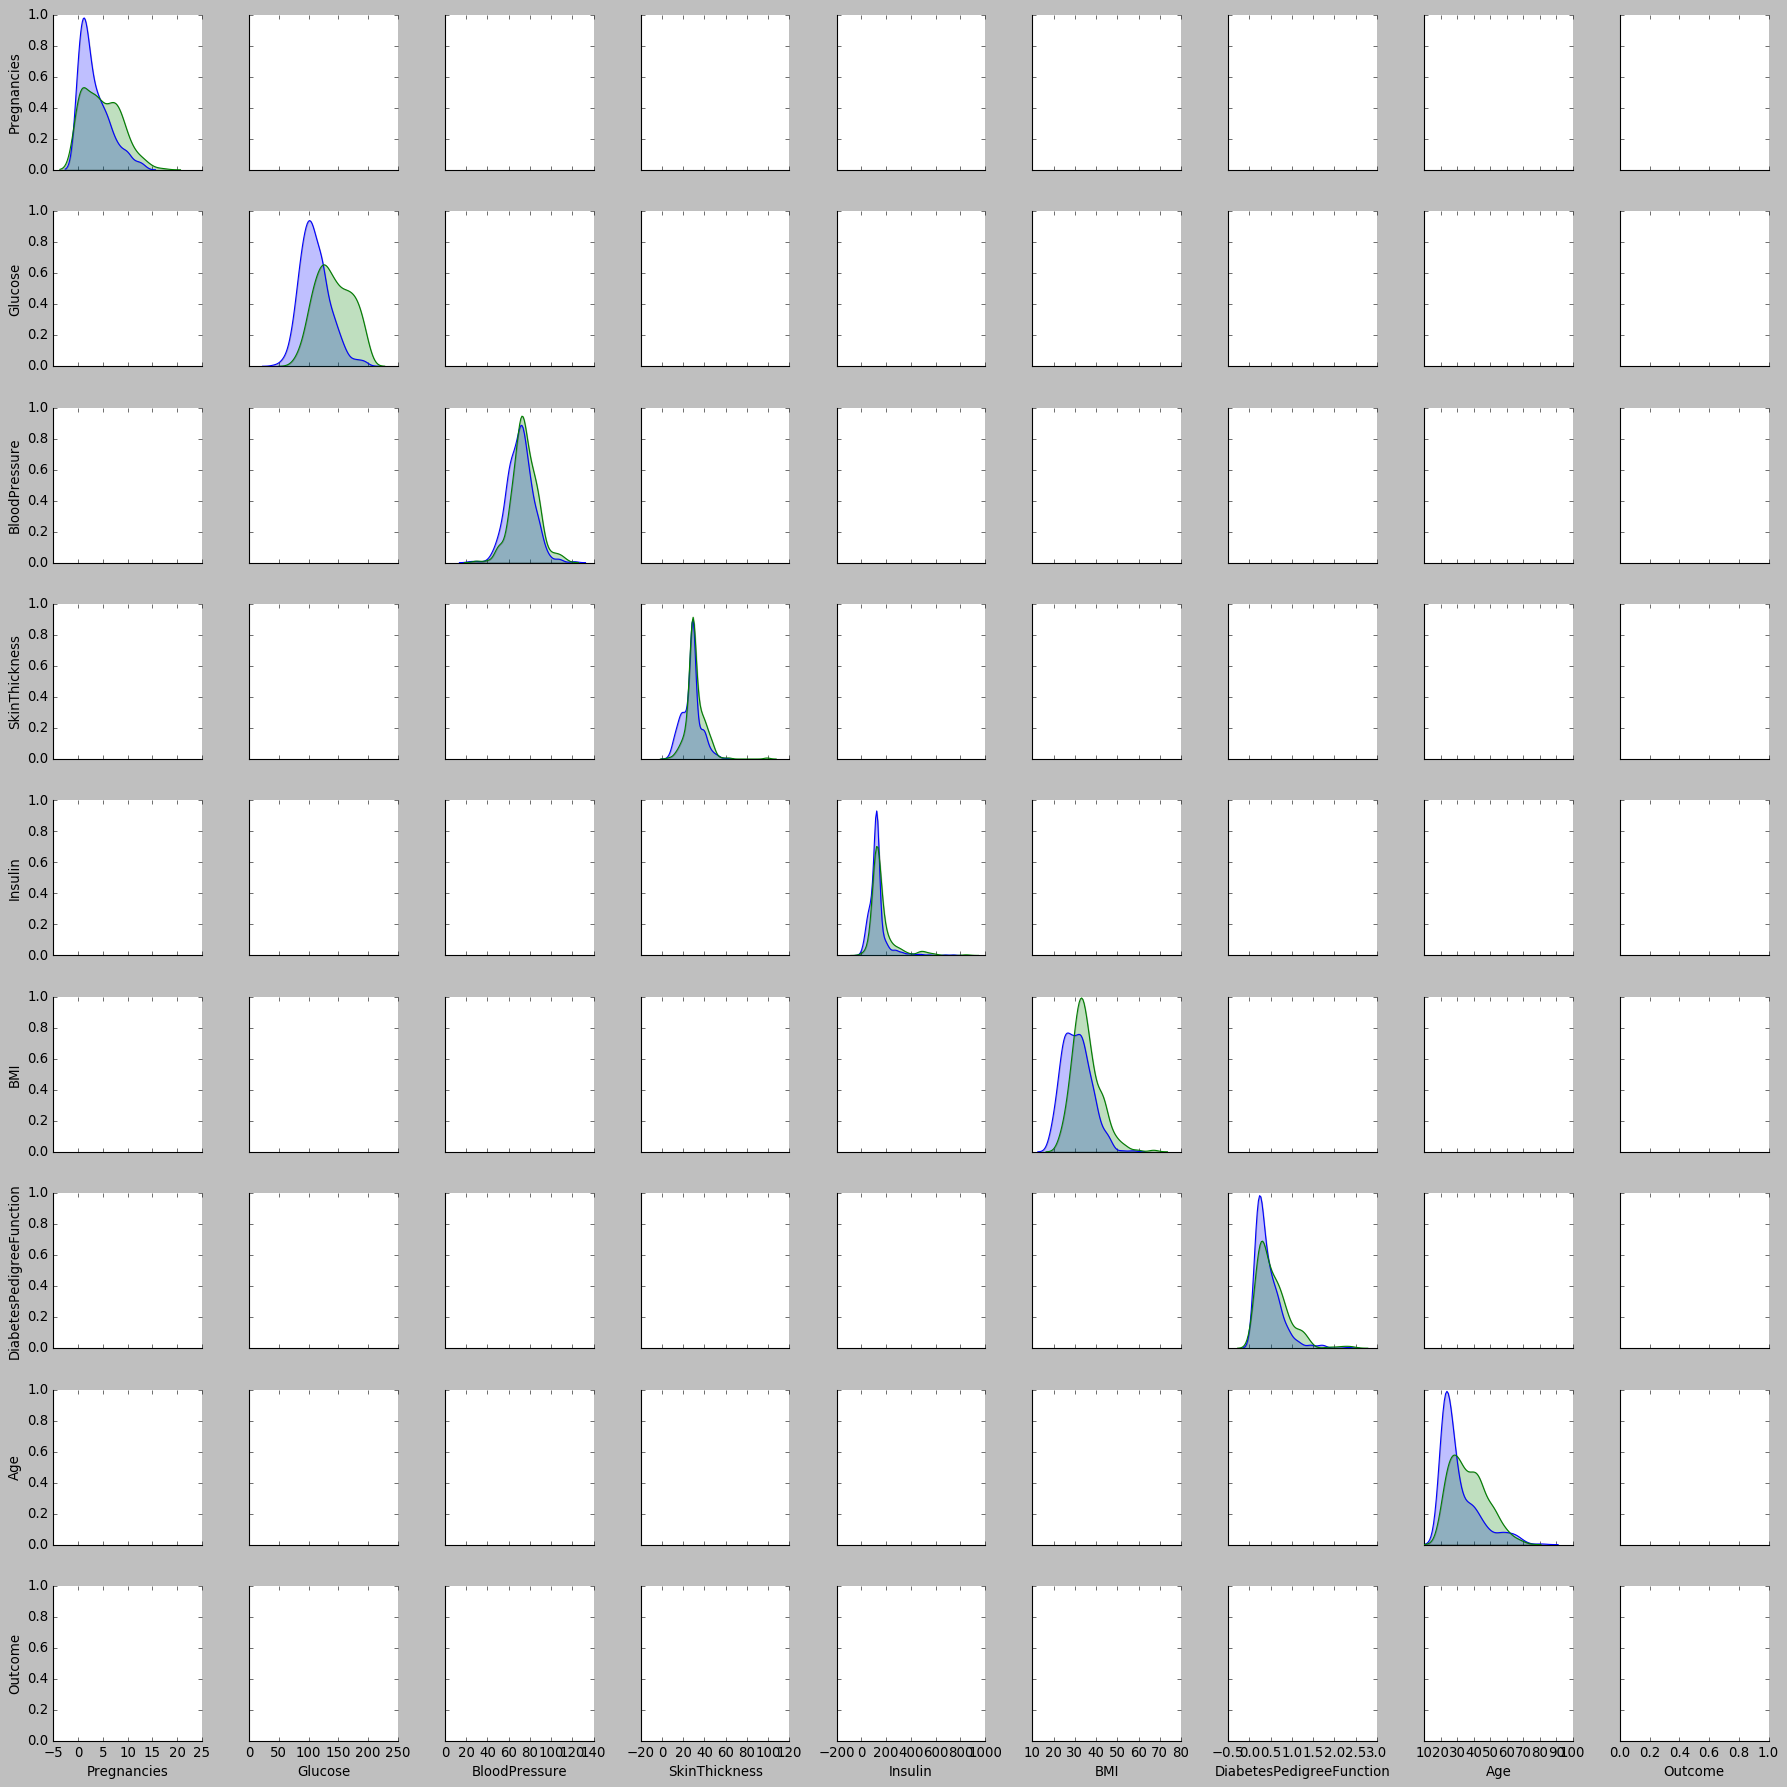

In [81]:
sns.pairplot(data=diabetes_data_copy,hue='Outcome',diag_kind='kde', kind="reg")
plt.show()

Heatmap for unclean data

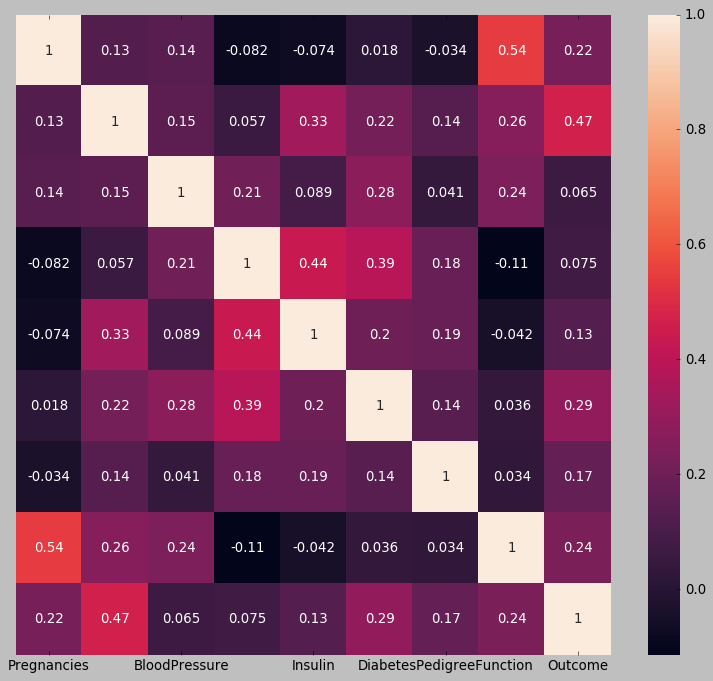

In [82]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
ax = sns.heatmap(diabetes_data.corr(), xticklabels=2, annot=True ,yticklabels=False)

Here I would like to clarify something very important

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

///////////////////////////////////////////////////////////////////////////////////////////////////////

pandas_profiling library
Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

Type inference: detect the types of columns in a dataframe.
* Essentials: type, unique values, missing values
* Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
* Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
* Most frequent values
* Histogram
* Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
* Missing values matrix, count, heatmap and dendrogram of missing values
* Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.

In [83]:
from pandas_profiling import ProfileReport 

profile = ProfileReport(diabetes_data.corr(), title='Pandas profiling report ' , html={'style':{'full_width':True}})

profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'pandas_profiling'

Scaling the data

data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:


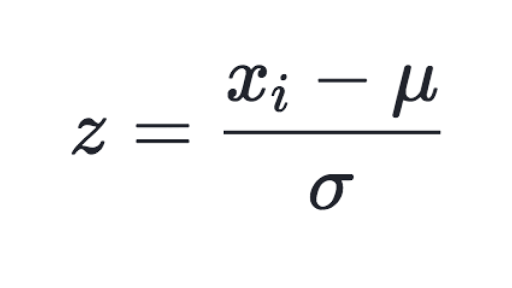

In [84]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [85]:
y = diabetes_data_copy.Outcome

In [119]:
x = diabetes_data_copy.drop(["Outcome"] , axis=1)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42, stratify=y)

In [102]:
# Import Libraries
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying VotingClassifier Model 

'''
#ensemble.VotingClassifier(estimators, voting=’hard’, weights=None,n_jobs=None, flatten_transform=None)
'''

#loading models for Voting Classifier
LRModel_ = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=33)
RFModel_ = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=5, random_state=33)
KNNModel_ = KNeighborsClassifier(n_neighbors= 10, weights ='uniform', algorithm='auto')
NNModel_ = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000, 20),learning_rate='constant',activation='relu', power_t=0.4, max_iter=250)

#loading Voting Classifier
VotingClassifierModel = VotingClassifier(estimators=[('LRModel',LRModel_),('RFModel',RFModel_),('KNNModel',KNNModel_),('NNModel',NNModel_)], voting= 'soft')
VotingClassifierModel.fit(X_train, y_train)

#Calculating Details
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')


VotingClassifierModel Train Score is :  0.93359375
VotingClassifierModel Test Score is :  0.7421875
----------------------------------------------------


###### #Calculating Prediction


In [103]:
y_pred = VotingClassifierModel.predict(X_test)
print('Predicted Value for VotingClassifierModel is : ' , y_pred[:10])

Predicted Value for VotingClassifierModel is :  [0 1 0 0 0 0 1 1 0 0]


Text(0.5, 23.999999999999986, 'Predicted label')

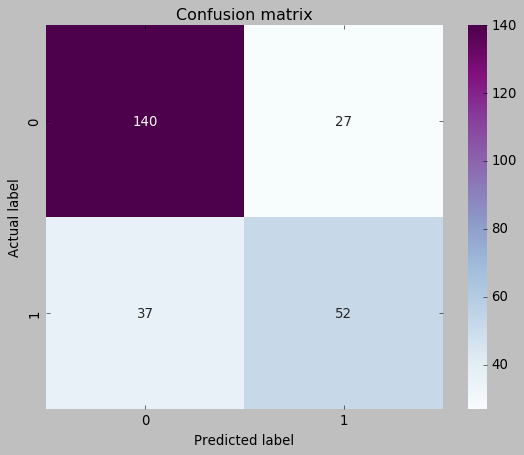

In [89]:

#Calculating Confusion Matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [90]:
#Import Libraries
from sklearn.metrics import accuracy_score
#----------------------------------------------------

#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  192


In [91]:
#Import Libraries
from sklearn.metrics import f1_score
#----------------------------------------------------

#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.75


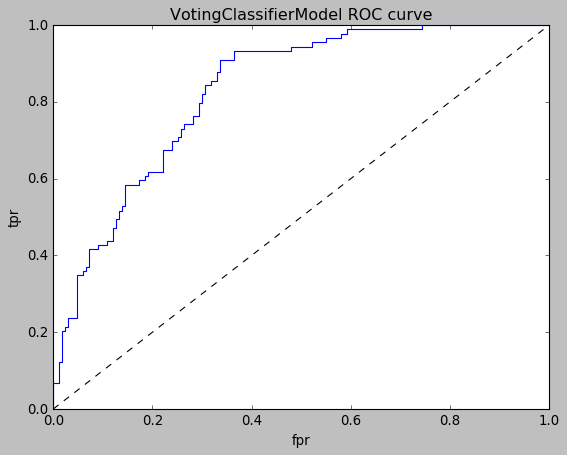

In [92]:
from sklearn.metrics import roc_curve
y_pred_proba = VotingClassifierModel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('VotingClassifierModel ROC curve')
plt.show()

https://seaborn.pydata.org/search.html?q=cmap&check_keywords=yes&area=default
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

## Creating a pipeline

In [121]:
model_pipe = Pipeline([('standardscalar', StandardScaler()) , ('model', VotingClassifierModel)])
model_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 VotingClassifier(estimators=[('LRModel',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                                                                  l1_ratio=None,
                                                                  max_iter=100,
                                                                  multi_class='multinomial',
                                                                  n_jobs=None,
                                         

In [122]:
import sklearn.externals.joblib as jb
jb.dump(VotingClassifierModel , 'saved file.sav')
savedmodel = jb.load('saved file.sav')
# y_pred = savedmodel.predict(X_test)
y_pred = model_pipe.predict(X_test)

print('Predicted Value for VotingClassifierModel is : ' , y_pred[:10])


Predicted Value for VotingClassifierModel is :  [0 1 0 0 0 0 1 1 0 0]


In [130]:
new_test = pd.DataFrame([[6, 60, 66, 23, 0, 100, 0.167, 21] , [2,72,45,78,80,30,0.6,35]],
            columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [131]:
y_new_pred = model_pipe.predict(new_test)
y_new_pred

array([1, 0], dtype=int64)